In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import math
from generate_geoshape import *

In [20]:
N = 80
thick = 0.2
bound = 10.0
rad = 2.0
noise_dist = 'uniform'
period = 2

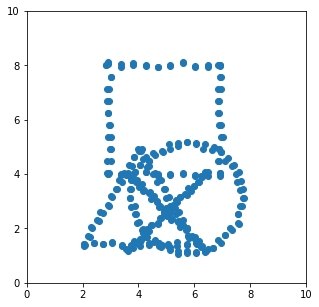

In [21]:
pos = sim_shapes(bound, N, rad, thick, period, noise_dist='uniform')

In [15]:
def circle(N, rad, thick, period=1.0, noise_dist='uniform'):
    rads = np.ones(N) * rad
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gau6ssian':
        noise = np.random.normal(0.0, thick, N)
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    rads = rads + noise
    angles = np.linspace(0, period * 2 * math.pi, N, endpoint=False)
    x = np.cos(angles) * rads
    y = np.sin(angles) * rads
    pos = np.concatenate((x[None,:], y[None, :]), 0)
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(x, y)
    return pos

In [ ]:
pos = circle(N, rad, thick, period, noise_dist='uniform')

In [ ]:
def square(N, rad, thick, period=1.0, noise_dist='uniform'):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, N)
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    
    pts_edge = int((N / period) / 4.)
    bottom_x = np.linspace(-rad, rad, pts_edge)
    bottom_y = np.ones(pts_edge) * (-rad)
    bottom_x = np.tile(bottom_x, period)
    bottom_y = np.tile(bottom_y, period) + noise[:int(N/4.)]
    
    left_x = np.ones(pts_edge) * (-rad)
    left_y = np.linspace(-rad, rad, pts_edge)
    left_x = np.tile(left_x, period) + noise[int(N/4.) : int(N/2.)]
    left_y = np.tile(left_y, period)
    
    top_x = np.linspace(-rad, rad, pts_edge)
    top_y = np.ones(pts_edge) * (rad)
    top_x = np.tile(top_x, period)
    top_y = np.tile(top_y, period) + noise[int(N/2.) : int(N*3/4.)]
    
    right_x = np.ones(pts_edge) * (rad)
    right_y = np.linspace(-rad, rad, pts_edge)
    right_x = np.tile(right_x, period) + noise[int(N*3/4.) :]
    right_y = np.tile(right_y, period)

    x = np.concatenate((bottom_x, left_x, top_x, right_x), 0)
    y = np.concatenate((bottom_y, left_y, top_y, right_y), 0)
    pos = np.concatenate((x[None,:], y[None, :]), 0)
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(x, y)    
    
    return pos

In [ ]:
pos = square(N, rad, thick, period, noise_dist='uniform')

In [ ]:
def cross(N, rad, thick, period, noise_dist='uniform'):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, N)
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    
    rotate = np.array([[np.cos(math.pi/4.), - np.sin(math.pi/4.)], [np.sin(math.pi/4.), np.cos(math.pi/4.)]])
    pts_edge = int((N / period) / 2.)
    vertical_x = np.zeros(pts_edge)
    vertical_y = np.linspace(-rad, rad, pts_edge)
    vertical_x = np.tile(vertical_x, period) + noise[: int(N/2.)]
    vertical_y = np.tile(vertical_y, period)
    
    horizontal_y = np.zeros(pts_edge)
    horizontal_x = np.linspace(-rad, rad, pts_edge)
    horizontal_x = np.tile(horizontal_x, period)
    horizontal_y = np.tile(horizontal_y, period) + noise[int(N/2.):]
    
    x = np.concatenate((vertical_x, horizontal_x), 0)
    y = np.concatenate((vertical_y, horizontal_y), 0)
    pos = np.concatenate((x[None, :], y[None, :]), 0)
    pos = np.dot(rotate, pos)
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(pos[0], pos[1])    
    return pos

In [ ]:
pos = cross(N, rad* np.sqrt(2), thick, period, noise_dist='uniform')

In [ ]:
def triangle(N, rad, thick, period, noise_dist='uniform'):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, N)
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    
    right_rotate = np.array([[np.cos(math.pi/6.), - np.sin(math.pi/6.)], [np.sin(math.pi/6.), np.cos(math.pi/6.)]])
    left_rotate = np.array([[np.cos(math.pi/6.), np.sin(math.pi/6.)], [- np.sin(math.pi/6.), np.cos(math.pi/6.)]])
    
    pts_edge = int((N / period ) / 3.)
    bottom_x = np.linspace(-rad, rad, pts_edge)
    bottom_y = np.zeros(pts_edge)
    bottom_x = np.tile(bottom_x, period)
    bottom_y = np.tile(bottom_y, period) + noise[:pts_edge*period]
    bottom_pos = np.concatenate((bottom_x[None, :], bottom_y[None, :]), 0)
    
    left_x = np.zeros(pts_edge)
    left_y = np.linspace(0, 2*rad, pts_edge)
    left_x = np.tile(left_x, period) + noise[pts_edge*period:pts_edge*period*2]
    left_y = np.tile(left_y, period)    
    left_pos = np.concatenate((left_x[None, :], left_y[None, :]), 0)
    left_pos = np.dot(left_rotate, left_pos)
    left_pos[0] = left_pos[0] - rad
    
    right_x = np.zeros(pts_edge)
    right_y = np.linspace(0, 2*rad, pts_edge)
    right_x = np.tile(right_x, period) + noise[pts_edge*period*2:pts_edge*period*3]
    right_y = np.tile(right_y, period)
    right_pos = np.concatenate((right_x[None, :], right_y[None, :]), 0)
    right_pos = np.dot(right_rotate, right_pos) 
    right_pos[0] = right_pos[0] + rad
    
    pos = np.concatenate((bottom_pos, left_pos, right_pos), -1)
    pos[1] = pos[1] - rad * np.sqrt(3) /2 
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(pos[0], pos[1])  
    return pos

In [ ]:
pos = triangle(N, rad, thick, period, noise_dist='uniform')